Name: Pranali Jadav

Jupyter notebook for the project.

As part of a mobile app development class, I am creating a travel/language learning app that will help users select a destination they are travelling to and would like to the learn the laguage of to help them in their visit. depending on the purpose of the visit, the app is capable of suggesting users words to learn catered to their particular situation. The app also provides helpful tips, tourist location, and restaurants to eat at. for the learning language section, it is done using crosswrords puzzles and flashcards. 

Thinking of the future, if i ever want to actually market the app, i would like to know what would be the most beneficial business model in terms of an android app marketing. For that purpose, i want to analyze the current apps on the android market to see what apps do the best in their respective category. 

The dataset for the Google Play store apps was found on Kaggle and will be used for this project. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import time
test=pd.read_csv('googleplaystore.csv')


In [2]:
#test[test['Category'].isin(['COMMUNICATION'])]


The application considered can fall under following categories.
Books and references
communication
education
Entertainment
food and drink
Game 
travel and local

thus we will filter our data to only anayze those categories as we cannot put our app in other categories. 
These categories can be customized for any application.


In [3]:
ourCategories = ['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'EDUCATION', 'ENTERTAINMENT', 'FOOD_AND_DRINK', 'GAME', 'TRAVEL_AND_LOCAL']
ourContentRating = ['Everyone']

ourData = test[test['Category'].isin(ourCategories)]
ourData = ourData[ourData['Content Rating'].isin(ourContentRating)]


In [4]:
#ourData['Rating'].fillna(ourData.groupby('Category')['Rating'].transform('mean'), inplace = True)

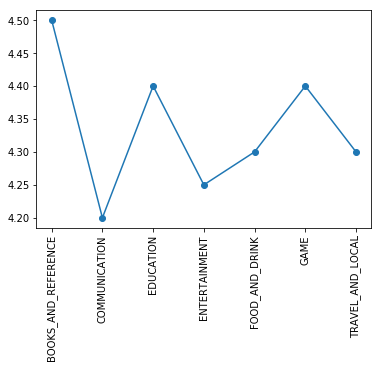

In [5]:
step1 = ourData[['Category', 'Rating']].groupby('Category').median()
step1
plt.plot(step1, '-o')
plt.xticks(rotation=90)
plt.savefig("figure1.png") # save as png

By simply plotting the median rating in these categories, we can see that most apps in these category have a rating above 4, leading me to believe that my app can survive in these categories. though the data can be biased seeing as we dont yet know how many rating were recieved and if there was a bias. 

We will now try to take into account number of installs and ratings to see if there is a merit to the rating. 

In [6]:
step2 = ourData.copy()
step2['Relative Rating'] = step2['Rating']/step2['Reviews']

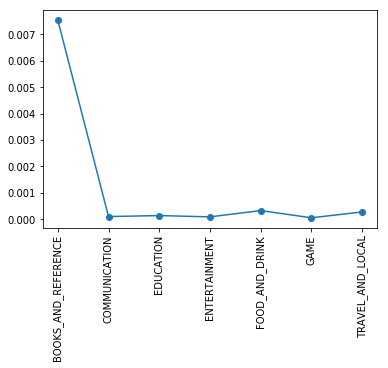

In [7]:
step3 = step2[['Category', 'Relative Rating']].groupby('Category').median()
plt.plot(step3, '-o')
plt.xticks(rotation=90)
plt.savefig("figure2.png") # save as png

The lower the numbers, the more reviews it received and yet had a higher rating. Thus we can see Books and reference category is misrepresented as it has fewer reviews for its apps and thus the rating does not hold much weight. 

Also, two of the lowest numbers are entertainment and Game

Next lets check the installs in each category to see which of these have the most number of installs

In [8]:
ourData.dtypes
ourData['Price'] = ourData['Price'].astype(float)
ourData['Installs'] = ourData['Installs'].astype(int)
ourData['Rating'] = ourData['Rating'].astype(float)
ourData['Content Rating'] = ourData['Content Rating'].astype('|S')

ourData['Reviews'] = ourData['Reviews'].astype(int)
ourData['Type'] = ourData['Type'].astype('|S')




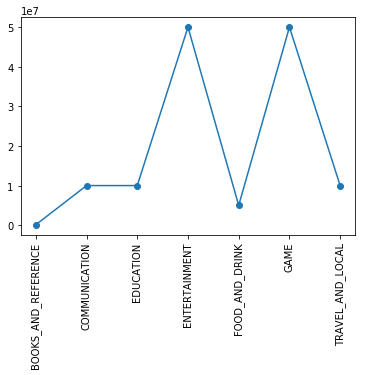

In [9]:
step4 = ourData[['Category', 'Installs']].groupby('Category').median()
plt.plot(step4, '-o')
plt.xticks(rotation=90)
plt.savefig("figure3.png") # save as png

The number of installs is scaled to represent in > number * 10000000, thus we see that education, entertainment, and games have over 10000000 installs, with games and entertainment being highest installs.

This was just to take a cursory look at the data to have a rough estimate of the data and have prelimnary hypothesis for the correlation between categories and the success of the app

Next we will try to run ANOVA statistic to see if we can prove statistically significant correlation 

In [10]:
from scipy import stats
F, p = stats.f_oneway(ourData[ourData.Category=='EDUCATION'].Installs,
                      ourData[ourData.Category=='GAME'].Installs,
                      ourData[ourData.Category=='ENTERTAINMENT'].Installs)

In [11]:
p

0.00037019259619334646

Looking at the F-statistic and p-value from the ANOVA test fro category vs Installs, we can see that there is no statistically significant relationship between these variables.

In [12]:

ourData['TypeInt']=(ourData['Type']=='Free').astype(int)
ourData.corr()

,Rating,Reviews,Installs,Price,TypeInt
Rating,1.000000,0.087700,0.049086,0.038120,NaN
Reviews,0.087700,1.000000,0.663685,-0.049618,NaN
Installs,0.049086,0.663685,1.000000,-0.055012,NaN
Price,0.038120,-0.049618,-0.055012,1.000000,NaN
TypeInt,NaN,NaN,NaN,NaN,NaN


In [13]:
ourData['Category'] = ourData['Category'].astype('|S')

Similarly, the correlation scores for numerical values in the data set do not meaningfully explain any correlation. Thus we can expect the linear model to not be an ideal fit for this dataset. 

In [14]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [15]:
X = ourData[['Category','Type','Content Rating']]
Y = ourData['Installs']


mydata = ourData[['Category','Type','Content Rating', 'Installs']]

In [16]:
X = pd.get_dummies(data=X, drop_first=True)

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = BernoulliNB() #MultinomialNB() #linear_model.LinearRegression()
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [18]:
print("Train accuracy is %.2f %%" % (regr.score(X_train, Y_train)*100))
print("Test accuracy is %.2f %%" % (regr.score(X_test, Y_test)*100))

Train accuracy is 18.94 %
Test accuracy is 17.74 %


Trying different models for categorical data classification, we can see that Bernoulli Naive-Bayes offer the most accuracy, though it is not proven to be anywhere close to a good fit. 

From these tests, finding a model was extremely difficult and the original hypothesis of using the data to predict could not be tested at a statistical level.

Though the empirical data still gives use some inkling about some trends of human thinking. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


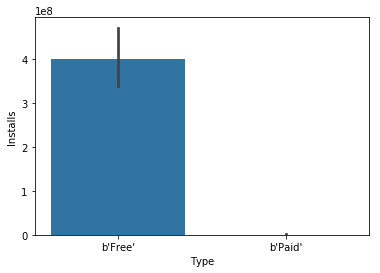

In [19]:
import seaborn as sns

sns.barplot(x='Type', y='Installs', data=mydata)
plt.savefig("figure4.png") # save as png

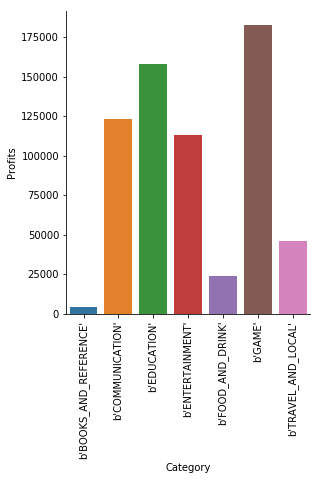

In [20]:
ourData['Profits'] = ourData['Price']*ourData['Installs']

step4 = ourData[['Category', 'Profits']].groupby('Category').mean().reset_index()
g=sns.catplot(x='Category', y='Profits',kind='bar', data=step4)
g.set_xticklabels(rotation=90)
g.savefig("figure5.png") # save as png

We can see from the bar chart above, that if the app is to be made paid, education and game both prove to be good category in terms of profits. 

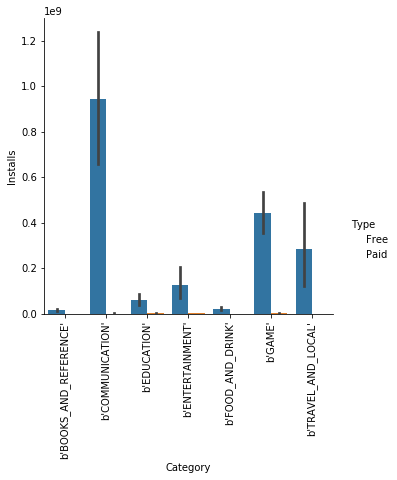

In [21]:
g=sns.catplot(x="Category", y="Installs", hue="Type", kind="bar", data=ourData);
g.set_xticklabels(rotation=90)
g.savefig("figure6.png") # save as png

While for free apps, Game and communication prove to be good categories. Travel and local is close up as well, making it more appropriate for our app.

In Conclusion, we can see that emprirical data provides a good indication of what categories are a good start to have, but ther is no statistical significance that was attached to these results. 